Data Loading and Cleaning

```
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/petroleum_prices.csv')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

# Create visuals directory if it doesn't exist
os.makedirs('visuals', exist_ok=True)

# Load data with proper encoding for the BOM character
df = pd.read_csv('petrol_price.csv', encoding='utf-8-sig')

# Data cleaning
# Extract year and month from date column
df[['Year', 'Month']] = df['date'].str.split('_', expand=True)
df['Year'] = df['Year'].astype(int)

# Create a proper datetime column
month_map = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}
df['Month_Num'] = df['Month'].map(month_map)
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month_Num'].astype(str) + '-01')
df.set_index('Date', inplace=True)

# Drop unnecessary columns
df.drop(['date', 'Month_Num'], axis=1, inplace=True)

# Get list of state columns (excluding Year and Month)
states = [col for col in df.columns if col not in ['Year', 'Month']]

Time Series Seeries Analysis

# Time Series Analysis

## Introduction

Time series is a sequence of data points indexed in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Thus it is a sequence of discrete-time data. Examples of time series are heights of ocean

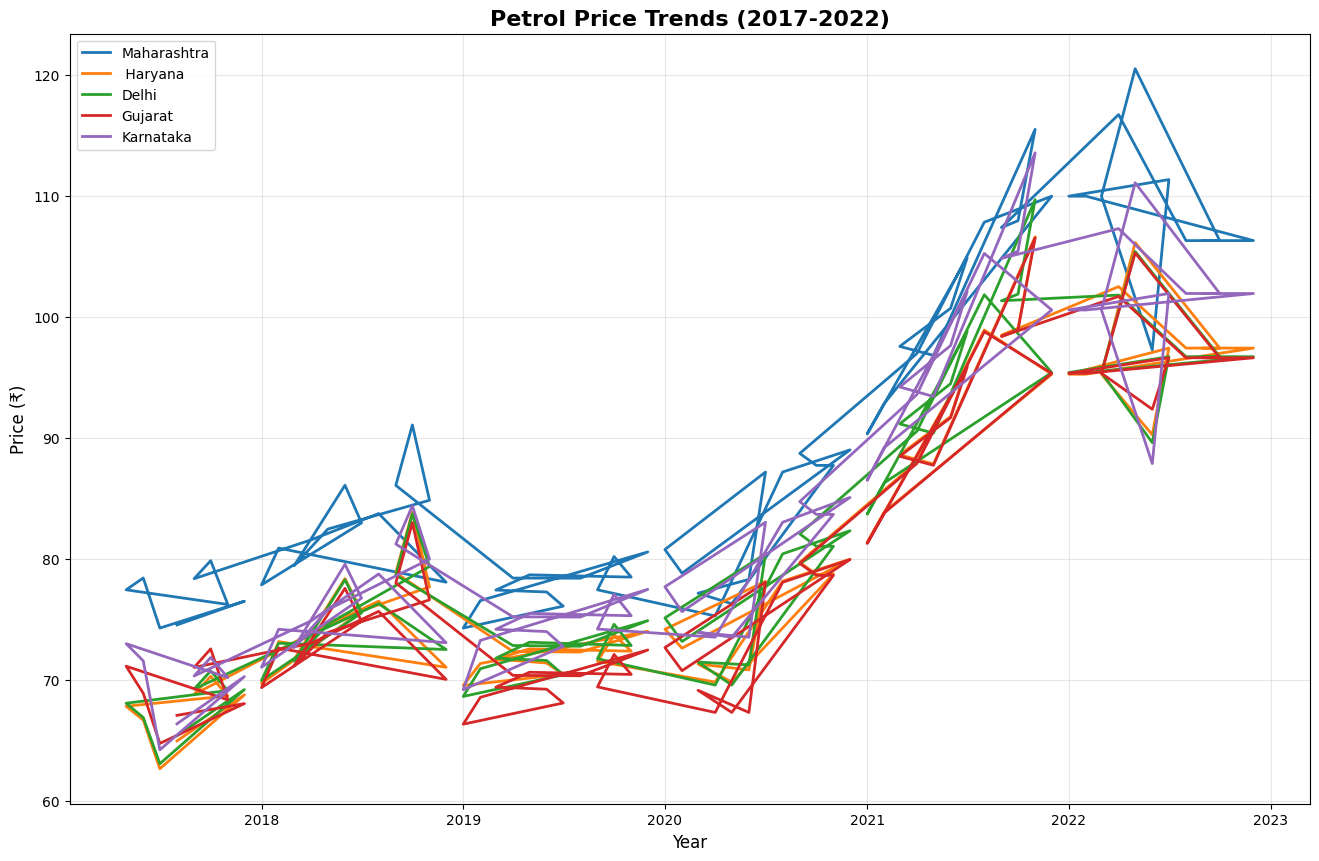

In [2]:
# Set style for better visualizations
plt.style.use('default')  # Using default style as seaborn-v0_8 might not be available
plt.figure(figsize=(16, 10))

# Plot price trends for first 5 states
for i, state in enumerate(states[:5]):
    plt.plot(df.index, df[state], label=state, linewidth=2)

plt.title('Petrol Price Trends (2017-2022)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price (₹)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('visuals/price_trends.png', dpi=300, bbox_inches='tight')
plt.show()

Seasonal Analysis

# Seasonal Analysis

Seasonal Analysis is a powerful tool for understanding the seasonal patterns in your data. It helps you identify trends, cycles, and anomalies that occur at regular intervals throughout the year.

## What is Seasonal Analysis?

Seasonal Analysis is a statistical method used to analyze data that exhibits seasonal patterns. It involves breaking down the data into its seasonal components, which can help in forecasting future values and understanding the underlying trends.

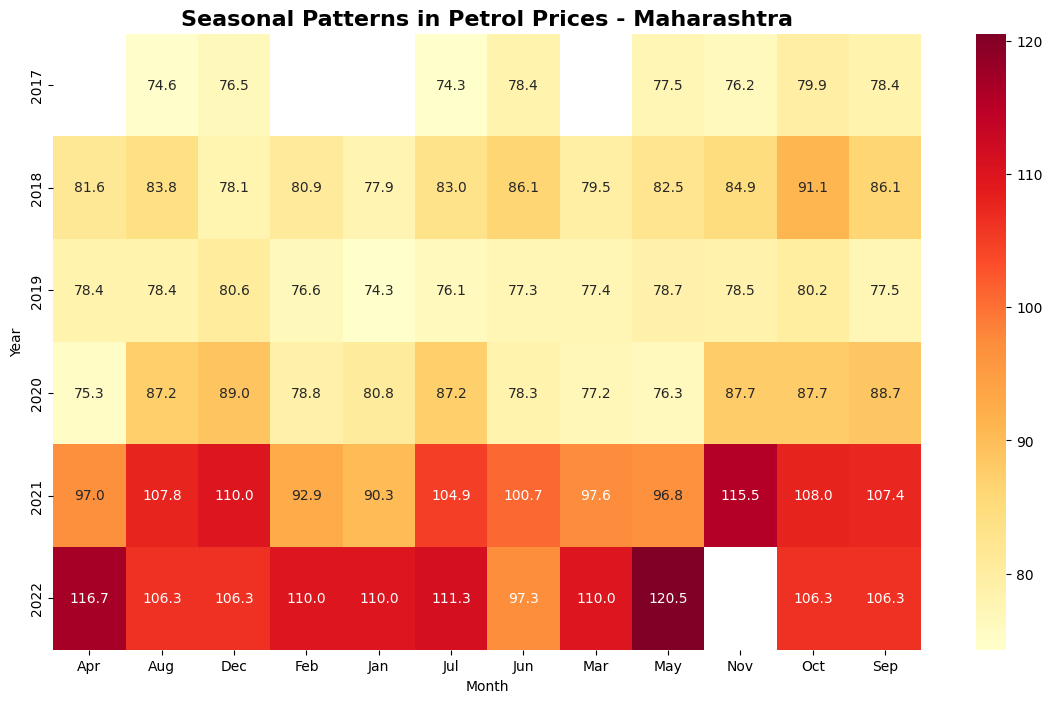

In [3]:
# Pivot table for seasonal analysis
seasonal_data = df.groupby(['Year', 'Month']).mean().reset_index()

plt.figure(figsize=(14, 8))
# Use the first state for the heatmap if Maharashtra doesn't exist
state_for_heatmap = 'Maharashtra' if 'Maharashtra' in df.columns else states[0]
sns.heatmap(seasonal_data.pivot(index='Year', columns='Month', values=state_for_heatmap), 
            cmap='YlOrRd', annot=True, fmt='.1f')
plt.title(f'Seasonal Patterns in Petrol Prices - {state_for_heatmap}', fontsize=16, fontweight='bold')
plt.savefig('visuals/seasonal_patterns.png', dpi=300, bbox_inches='tight')
plt.show()

COVID-19 Impact Analysis

# COVID-19 Impact Analysis

## COVID-19 Impact Analysis

The COVID-19 pandemic has had a significant impact on businesses and economies worldwide. To understand the extent of this impact, it is essential to analyze the data and trends related to the pandemic. This analysis will help businesses make informed decisions and plan for the future.

### Key Areas of Impact

1. **Economic Impact**
   - **GDP Growth**: The pandemic has led to a significant decline in GDP growth rates.
   - **Unemployment**: There has been a surge in unemployment rates due to business closures and reduced consumer spending.

<Figure size 1400x800 with 0 Axes>

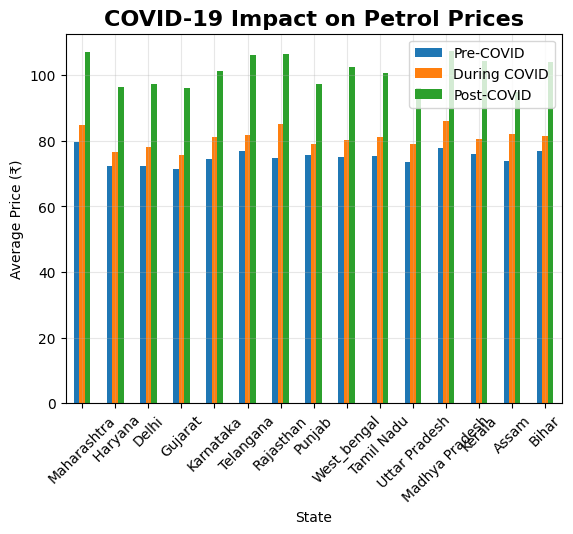

In [4]:
# Define COVID periods
pre_covid = df[df.index < '2020-03-01']
during_covid = df[(df.index >= '2020-03-01') & (df.index < '2021-03-01')]
post_covid = df[df.index >= '2021-03-01']

# Calculate average prices for each period
period_comparison = pd.DataFrame({
    'Pre-COVID': pre_covid[states].mean(),
    'During COVID': during_covid[states].mean(),
    'Post-COVID': post_covid[states].mean()
})

# Plot comparison
plt.figure(figsize=(14, 8))
period_comparison.plot(kind='bar')
plt.title('COVID-19 Impact on Petrol Prices', fontsize=16, fontweight='bold')
plt.xlabel('State')
plt.ylabel('Average Price (₹)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.savefig('visuals/covid_impact.png', dpi=300, bbox_inches='tight')
plt.show()

Price Volatility Analysis

Price volatility analysis is a technique used to measure the degree of variation of a trading asset's price. It is a statistical measure of the dispersion of returns for a given asset or market index. It is often used by traders to understand the risk associated with a particular investment. Price volatility can be measured using various methods, including standard deviation, variance, and beta.

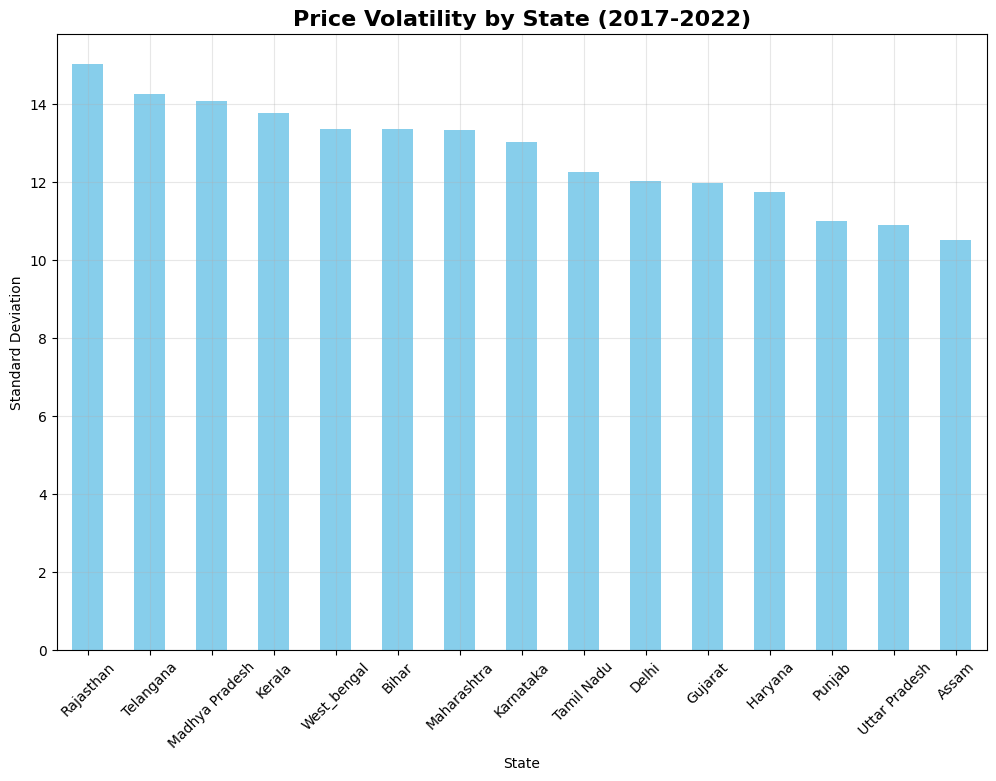

In [5]:
# Calculate volatility (standard deviation) by state
volatility = df[states].std().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
volatility.plot(kind='bar', color='skyblue')
plt.title('Price Volatility by State (2017-2022)', fontsize=16, fontweight='bold')
plt.ylabel('Standard Deviation')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.savefig('visuals/volatility.png', dpi=300, bbox_inches='tight')
plt.show()

Correlation Analysis of the Effects of Different Factors on the Performance of the 3D Printing Process

Yi-Chun Chen

1Department of Industrial Engineering and Management, National Chin-Yi University of Technology, Taichung, Taiwan 1

Chih-Cheng Chen

2Department of Industrial Engineering and Management, National Chin-Yi University of Technology, Taichung, Taiwan 2

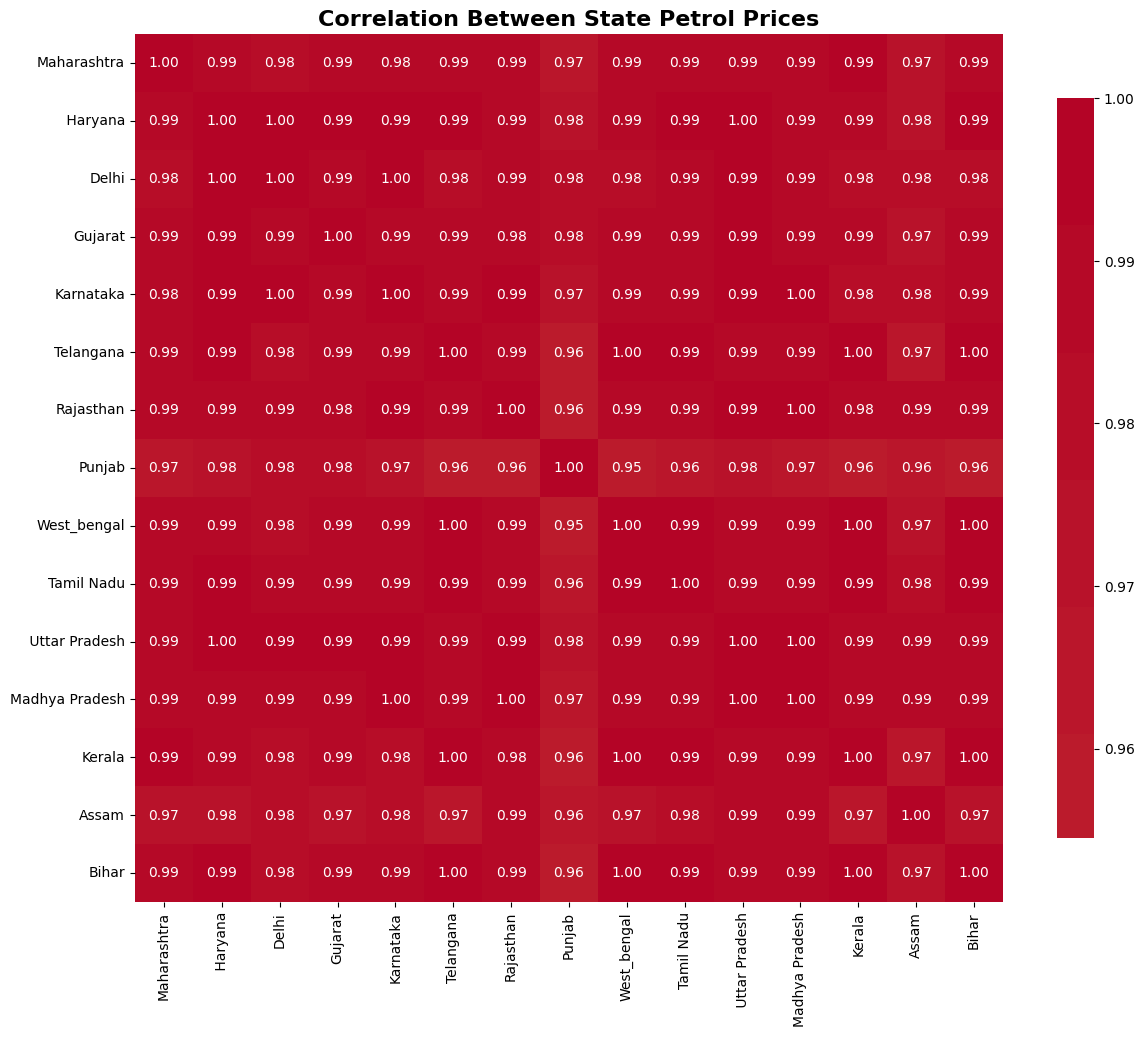

In [6]:
# Calculate correlation matrix
correlation_matrix = df[states].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Correlation Between State Petrol Prices', fontsize=16, fontweight='bold')
plt.savefig('visuals/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

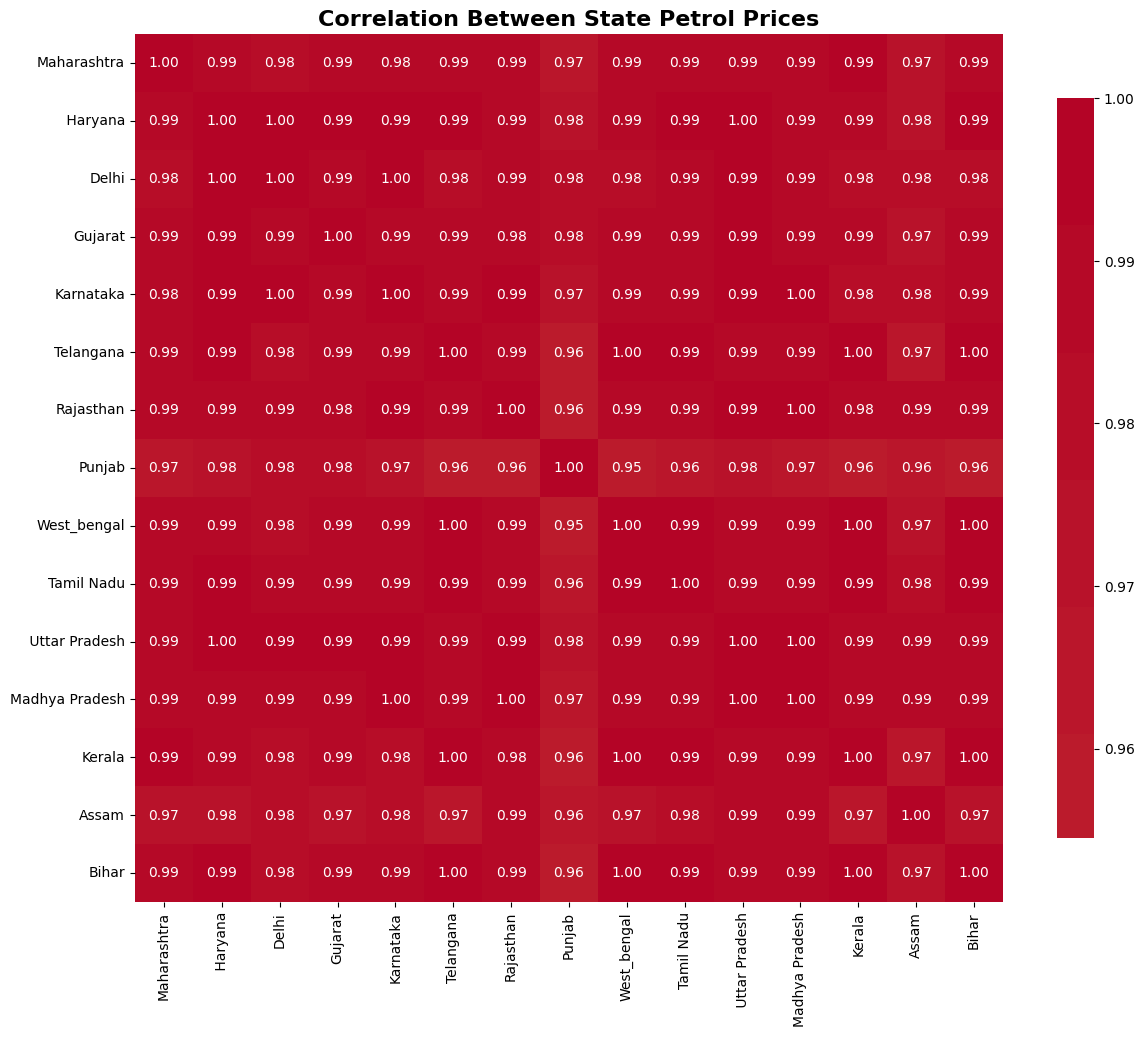

In [7]:
# Calculate correlation matrix
correlation_matrix = df[states].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Correlation Between State Petrol Prices', fontsize=16, fontweight='bold')
plt.savefig('visuals/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()